# 🧫 ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA, Expploratory Data Analyis)

## E_peak, Beta, Beta_rel, Sigma_d 🔭

In [4]:
%matplotlib inline

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Definir nombres de las columnas
columnas = ['Log(E_peak)', 'Log(beta)', 'Log(sigma)', 'Log(beta_Rel)', 'astro_DM']

# Obtener la ruta absoluta del notebook actual
notebook_dir = os.getcwd()

# Subir a la raíz del proyecto
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))

# Ruta completa al archivo de datos
input_file = os.path.join(project_root, 'data', 'raw', 'XY_bal_log_Rel.txt')

# Leer el archivo respetando encabezado real
df = pd.read_csv(input_file, sep='\s+', header=0)

# Renombrar columnas para claridad
df.columns = columnas

# Verificar lectura
df.head()


NameError: name '__file__' is not defined

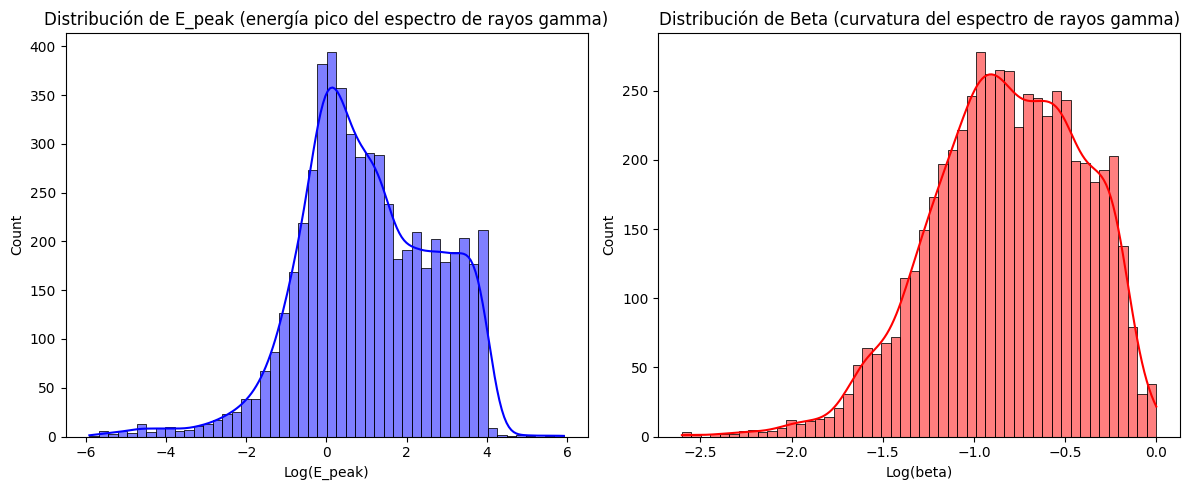

In [ ]:
# Convertir columnas a numéricas
for col in ['Log(E_peak)', 'Log(beta)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Graficar histogramas de E_peak y beta para ver su distribución
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['Log(E_peak)'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de E_peak (energía pico del espectro de rayos gamma)')

sns.histplot(df['Log(beta)'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribución de Beta (curvatura del espectro de rayos gamma)') 

plt.tight_layout()
plt.show()

In [ ]:
# Ver los primeros valores para verificar la estructura
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
0,-0.412502,-1.325139,1.356951,-0.122193,0.0
1,0.708140,-0.000174,0.623167,-1.601886,0.0
2,0.224740,-0.581202,1.010041,-0.311249,0.0
3,0.257319,-0.561933,0.615413,-0.038913,0.0
4,0.326110,-1.100179,1.624932,-0.528753,0.0


In [ ]:
# Muestra aleatoria de 5 filas
df.sample(5)

,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
5588,0.477266,-0.493224,1.341039,-0.645839,1.0
221,0.539177,-0.696372,0.985256,-0.266600,0.0
5238,3.457428,-0.443456,0.736715,0.402641,1.0
3149,-0.060131,-0.586365,0.883434,-0.050776,1.0
290,-0.189210,-1.150581,1.551271,-0.391538,0.0


In [ ]:
# Ver estadísticas generales (valores mínimos, máximos, media, desviación estandar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,1.018241,-0.819062,1.061131,-0.061574,0.500000
std,1.667957,0.413740,0.357026,0.478845,0.500044
min,-5.912006,-2.602060,0.608098,-3.198657,0.000000
25%,-0.086760,-1.093827,0.778414,-0.301915,0.000000
50%,0.883369,-0.805070,0.973677,-0.045029,0.500000
75%,2.302818,-0.502967,1.254676,0.287035,1.000000
max,5.918502,0.000000,2.899104,1.866966,1.000000


In [ ]:
# Ver los valores de correlación entre variables
print("Matriz de correlación entre variables:")
df.corr()

Matriz de correlación entre variables:


,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
Log(E_peak),1.000000,0.108252,-0.116761,0.355409,0.662491
Log(beta),0.108252,1.000000,-0.106935,-0.294714,0.280305
Log(sigma),-0.116761,-0.106935,1.000000,-0.347368,-0.143709
Log(beta_Rel),0.355409,-0.294714,-0.347368,1.000000,0.329702
astro_DM,0.662491,0.280305,-0.143709,0.329702,1.000000


# 📊 Gráficas

## 📌 Histogramas individuales de cada feature

<Figure size 1200x800 with 0 Axes>

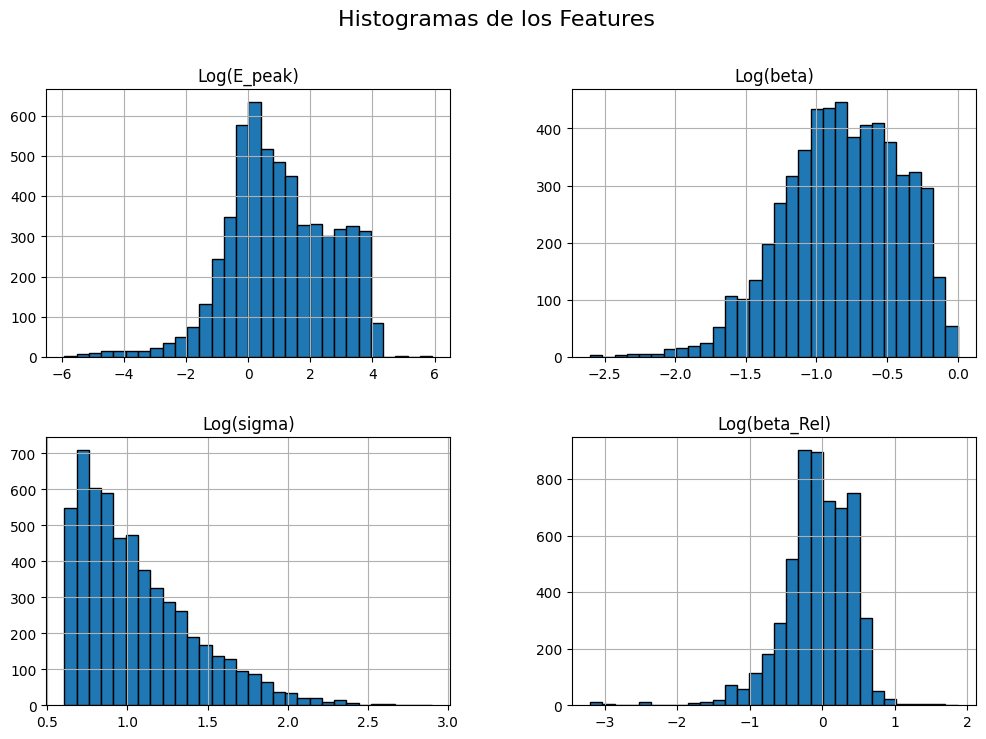

In [ ]:
# Configurar tamaño de gráficos
plt.figure(figsize=(12,8))

# Graficar histogramas para todas las variables excepto 'astro_DM'
df.drop(columns=['astro_DM']).hist(figsize=(12,8), bins=30, edgecolor='black')

plt.suptitle('Histogramas de los Features', fontsize=16)
plt.show()

## 📌 Matriz de correlación

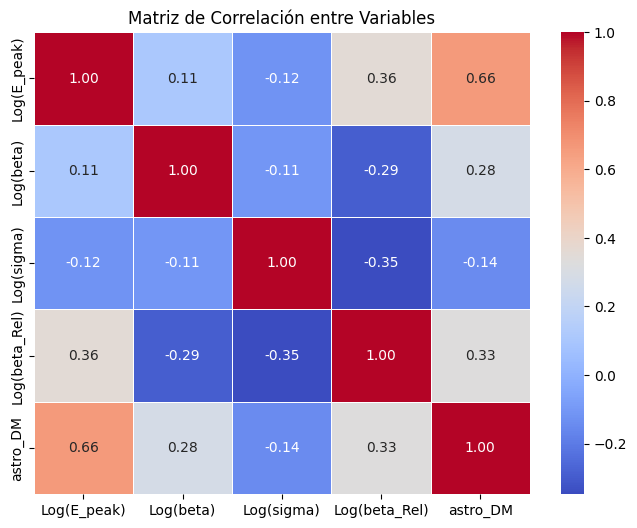

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

## 📌 Pairplot (gráfica de pares)

Permite visualizar la relación entre cada par de features.
Muestra cómo se separan las clases (astro_DM) en diferentes combinaciones de variables.

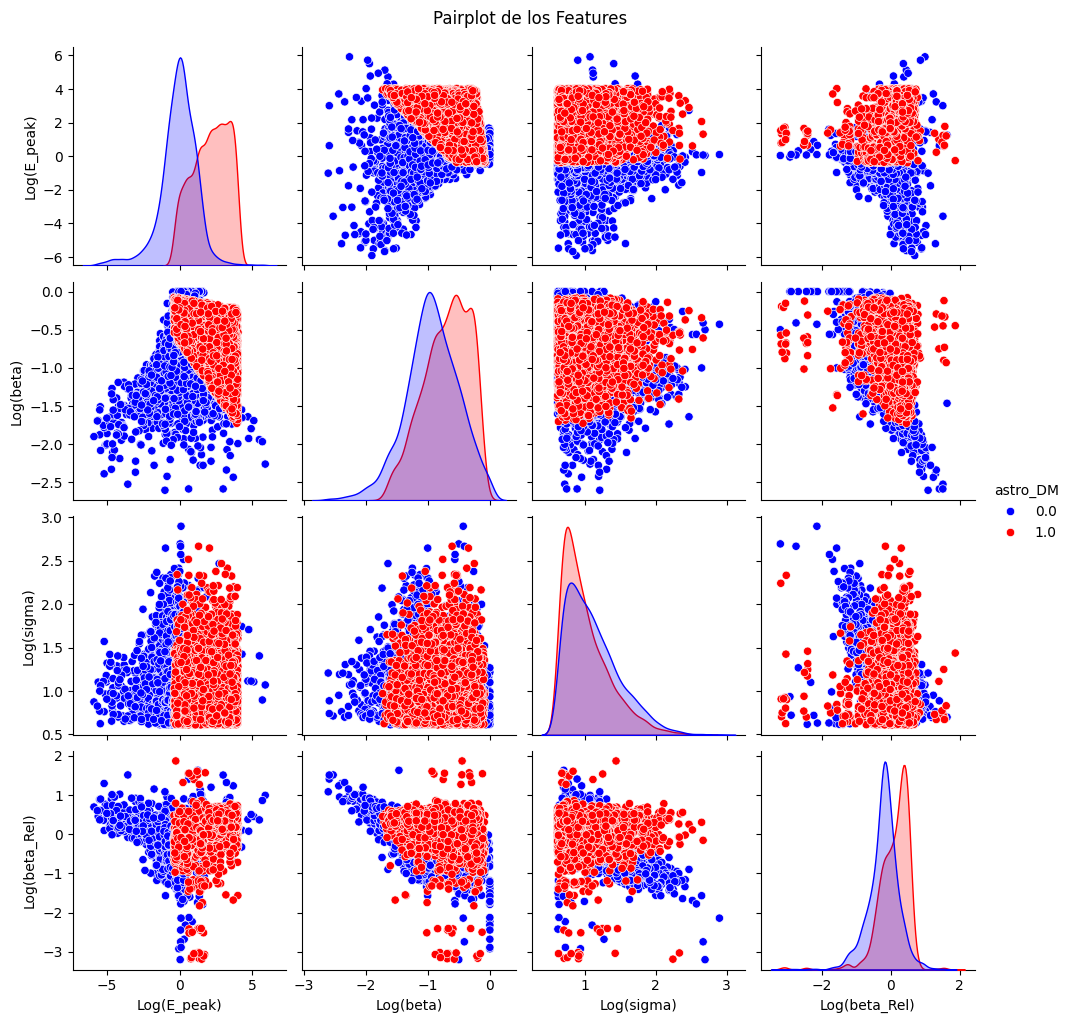

In [ ]:
sns.pairplot(df, hue="astro_DM", diag_kind='kde', palette=['blue', 'red'])
plt.suptitle('Pairplot de los Features', y=1.02)
plt.show()

## 📌 Scatter plot: E_peak vs beta (Beta-plot)

Permite ver cómo se distribuyen las clases astro_DM en este espacio.
Si hay buena separación, indica que estas features son útiles para la clasificación.

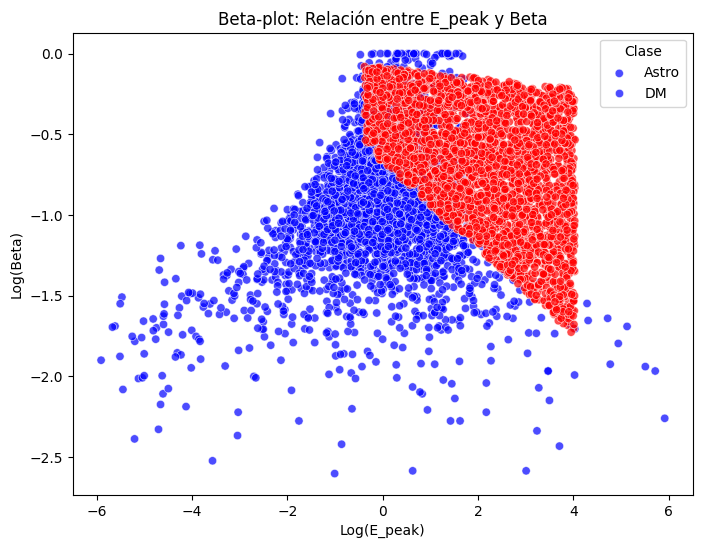

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Log(E_peak)', y='Log(beta)', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel('Log(E_peak)')
plt.ylabel('Log(Beta)')
plt.title('Beta-plot: Relación entre E_peak y Beta')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Scatter plot: beta_Rel vs sigma

Permite ver si hay relación entre la incertidumbre espectral y la significación de detección.
Podría ayudar a identificar fuentes con detecciones débiles o anomalías.

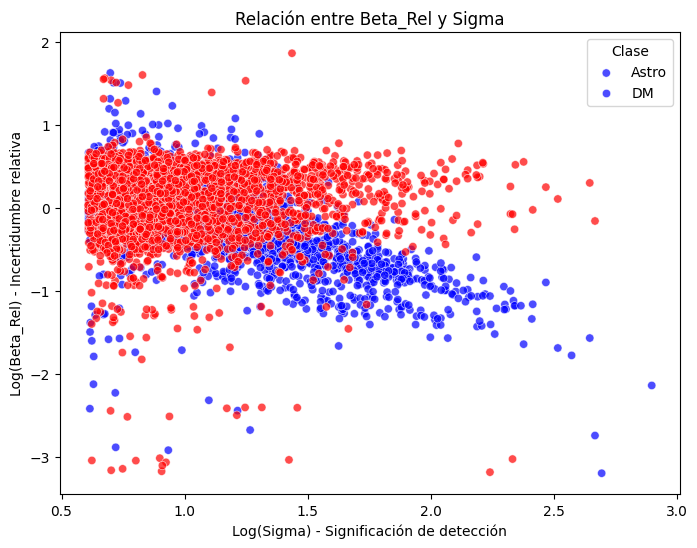

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Log(sigma)', y='Log(beta_Rel)', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel('Log(Sigma) - Significación de detección')
plt.ylabel('Log(Beta_Rel) - Incertidumbre relativa')
plt.title('Relación entre Beta_Rel y Sigma')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Boxplots para identificar valores atípicos

Ayuda a detectar outliers en cada feature.
Puede indicar si algunos valores extremos afectan la clasificación.

<Figure size 1200x800 with 0 Axes>

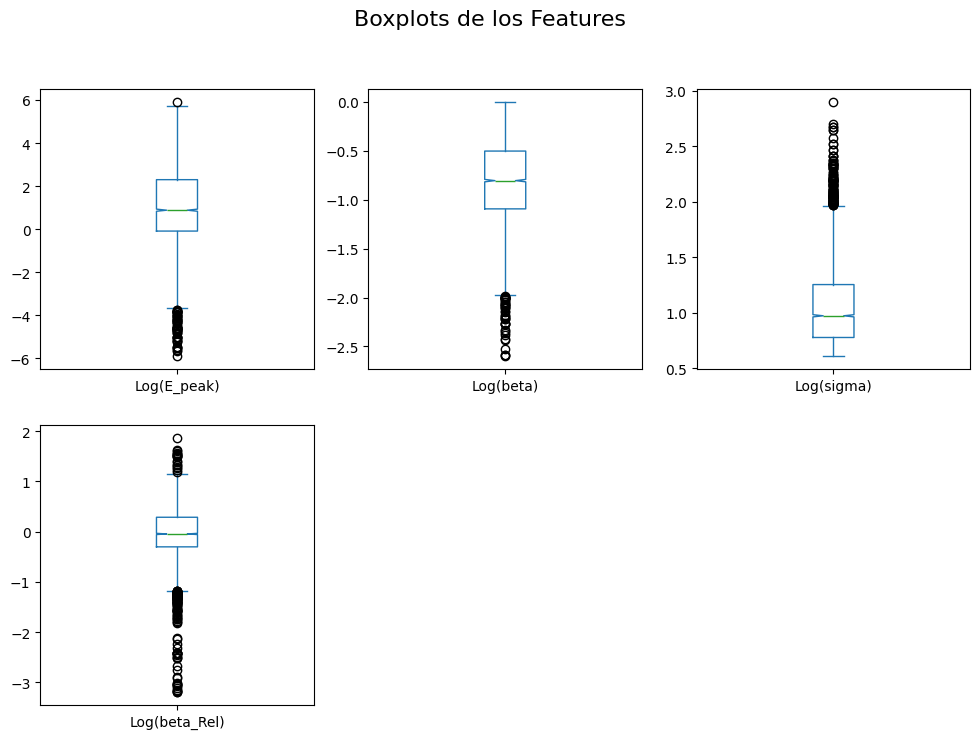

In [ ]:
plt.figure(figsize=(12,8))

# Graficar boxplots para todas las variables excepto 'astro_DM'
df.drop(columns=['astro_DM']).plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), notch=True)

plt.suptitle('Boxplots de los Features', fontsize=16)
plt.show()